# BioLGCA - A Mesosocopic Modelling Framework for Collective Phenomena

## Introduction
This Juypter notebook serves as an introduction to the BioLGCA python package. It consists of lattice-gas cellular automaton models for biological systems in 1D and 2D, which can be adapted, simulated and analyzed. First, visualization and simulation methods are introduced. Next, already implemented LGCA models are presented and analyzed. We conclude with a demonstration on how to code and use your own interactions in the BioLGCA framework.

## Class initialization
### Calling the class
To envoke the package and obtain the appropriate class instance, the function `get_lgca` of the `base.py` module is used

In [1]:
# we use inline plotting and switch to the 'notebook' backend later to show animations
%matplotlib inline  
from lgca import get_lgca
lgca = get_lgca(geometry='hex')

Random walk interaction is used.


### Setting an interaction
Note that we did not specify the lattice dimensions or an interaction rule, so the default parameters are used, which is a random walk on a hexagonal lattice. We can set specific interactions using `interaction=`, the lattice dimensions using `dims=`, boundary conditions with `bc=`, and interaction parameters and more using keyword arguments. 

In [2]:
lgca = get_lgca(geometry='hex', dims=(10, 10), interaction='aggregation')

sensitivity set to beta =  2.0


We now used the aggregation rule, which uses a sensitivity parameter `beta`, which is set to 2 by default. All available interactions can be printed using the class method `get_interactions`.

In [3]:
lgca.get_interactions()

['go_and_grow', 'go_or_grow', 'alignment', 'aggregation', 'random_walk', 'excitable_medium', 'nematic', 'persistant_motion', 'chemotaxis', 'contact_guidance']


The interaction can also be changed after initialization using the `set_interaction` method:

In [4]:
lgca.set_interaction(interaction='alignment', beta=3.0)

### Setting the initial state
By default, the initial state is a homogeneous state with constant mean density, that can be set using the `density` keyword. For `density = 0.1` every channel on the lattice is occupied with a probability of $0.1$. The state of the lgca class instance is saved in the array `nodes`. For example, for a 1D LGCA of size 5, without rest channels and with a homogeneous initial state, where each channel is occupied with a probability $\rho = 0.1$, we use

In [5]:
lgca = get_lgca(restchannels=0, density=0.1, dims=5, geometry='lin', bc='refl')

Random walk interaction is used.


We can print the current state as

In [6]:
lgca.print_nodes()

[[0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Simulating the system
A single time step without recording is performed with the `timestep` method:

In [7]:
lgca.timestep()
lgca.print_nodes()

[[0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]


To simulate the dynamics for longer times and record the steps we use the class method `timeevo`. It takes the keyword arguments `timesteps`, that sets the number of time steps to simulate. Also, all configurations can be recorded using `record=True`. To only record the density profile set `recorddens=True`. The total number of cells can be recorded with `recordN=True`, which is also the default.

In [8]:
lgca.timeevo(timesteps=100)
lgca.print_nodes()

Progress: [####################] 100% Done...
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]]


## Visualization
Visualization and plotting are different for 1D and 2D lattice geometries. The following section only applies to the 2D lattices, and the 1D equivalent is mentioned later. 
### Plotting
#### Density profile
The python package offers several methods to visualize LGCA states. A simple method is plotting the current density profile $$n(r,k) = \sum_i s_i (r,k).$$ Consider a LGCA on a square lattice,

Random walk interaction is used.


C:\Users\simon\PycharmProjects\BIO-LGCA\lgca\lgca_square.py:513: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under(alpha=0.0)


(<Figure size 800x700 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x1f9b4df09c8>)

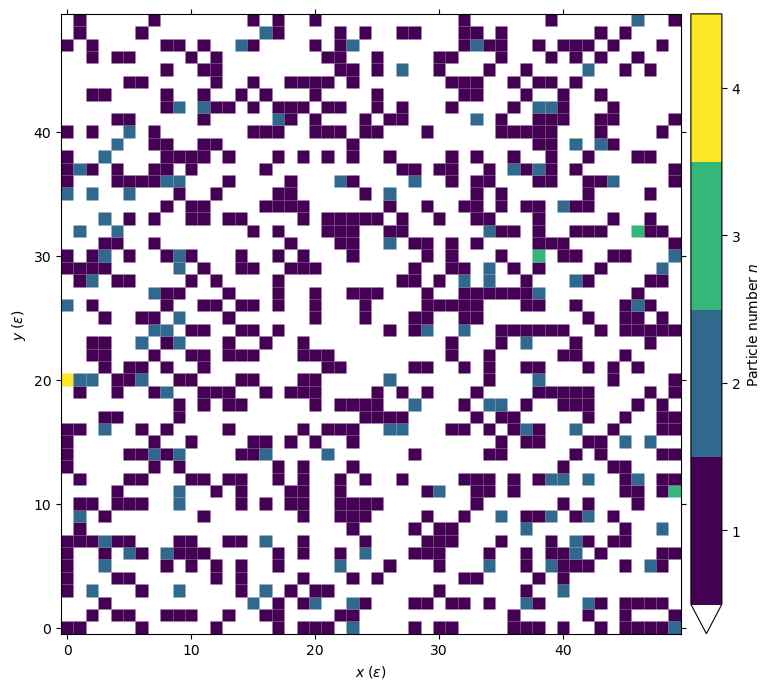

In [9]:
lgca = get_lgca(geometry='square')
lgca.plot_density()

#### Flux
Sometimes it is more useful to plot the local flux $$ \mathbf{J}(r,k) = \sum_i s_i(r,k) \mathbf{c_i}. $$ This can be achieved like follows:

(<Figure size 800x700 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x1f9b51750c8>)

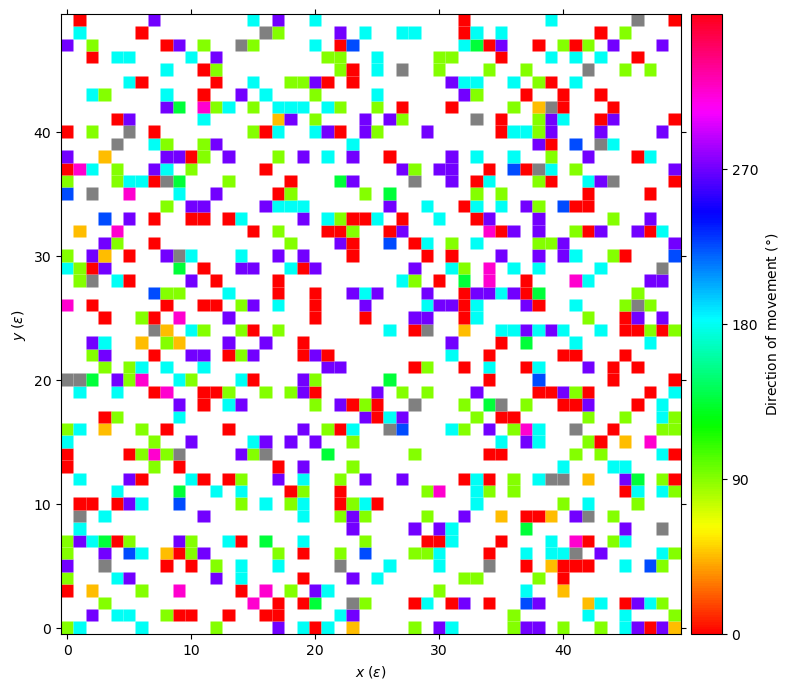

In [10]:
lgca.plot_flux()

Alternatively it is possible to plot a corresponding flow field:

C:\Users\simon\PycharmProjects\BIO-LGCA\lgca\lgca_square.py:424: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys"))
  cmap.set_under(alpha=0.0)


(<Figure size 800x800 with 1 Axes>,
 <matplotlib.quiver.Quiver at 0x1f9b69893c8>)

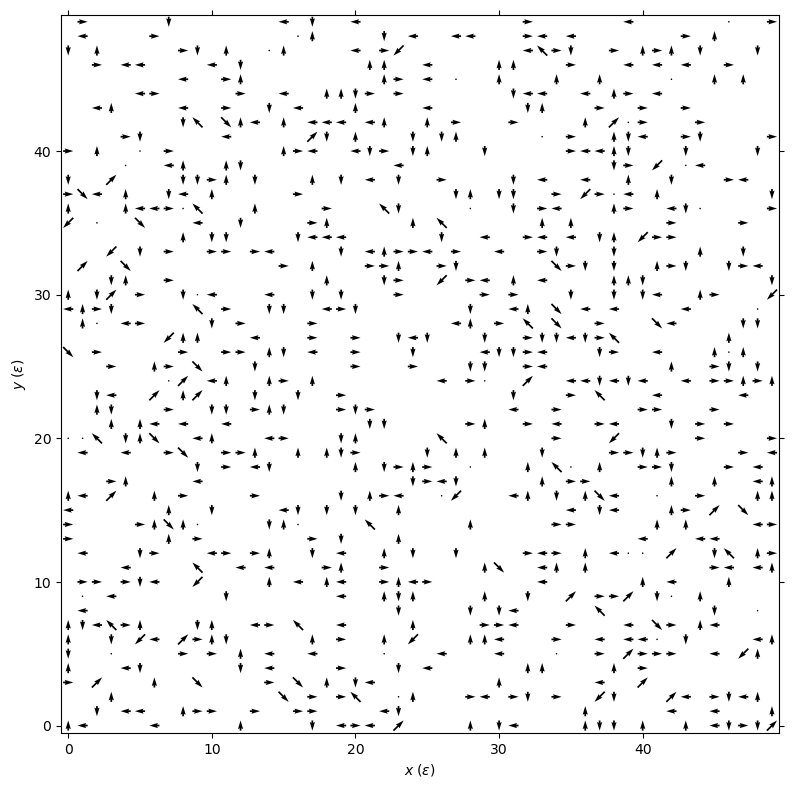

In [11]:
lgca.plot_flow()

#### Full configuration
For sketches, it is sometimes useful to plot the full lattice configuration. This is only advisable on small lattices. See the following example. Notice that the rest channels are depicted as circles, filled by a number, indicating the number of filled rest channels, while the occupied velocity channels are showns as black arrows.

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 1.]]]
Random walk interaction is used.


(<Figure size 800x800 with 1 Axes>,
 [Text(0.0, -0.08838834764831843, '2'),
  Text(0.0, 0.9116116523516815, '0'),
  Text(1.0, -0.08838834764831843, '0'),
  Text(1.0, 0.9116116523516815, '2')])

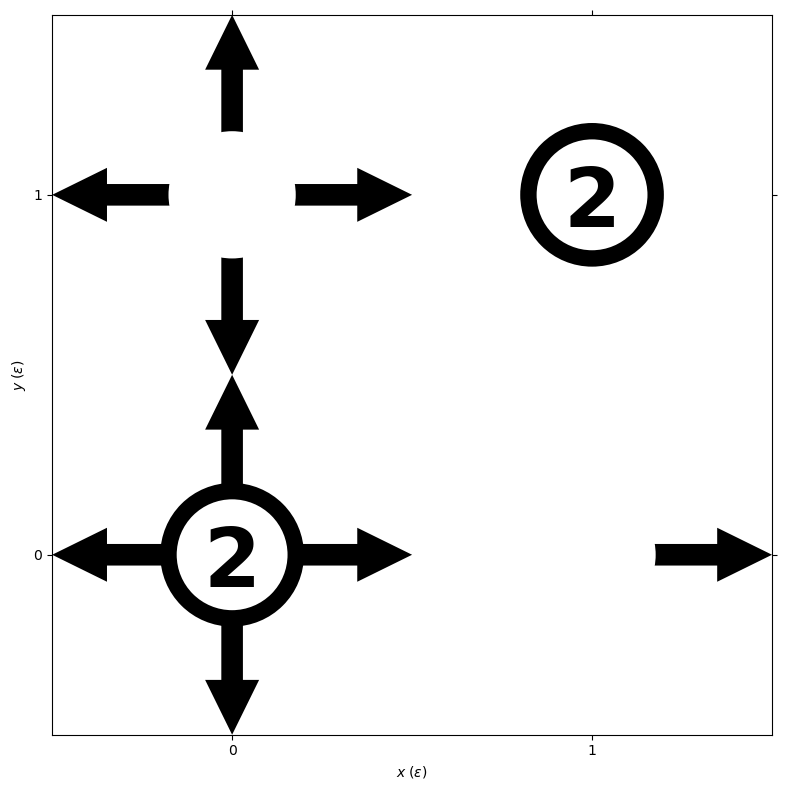

In [12]:
import numpy as np
nodes = np.zeros((2, 2, 6))
nodes[0, 0, :] = 1
nodes[1, 1, 4:] = 1
nodes[0, 1, :4] = 1
nodes[1, 0, 0] = 1
print(nodes)
lgca = get_lgca(geometry='square', density=0.25, nodes=nodes)
lgca.plot_config()
#

### Animation of dynamics
After recording configurations with the `timeevo` method, we can animate the dynamics (or plot it in a 2D plot, in the case of a 1D lattice).

In [13]:
lgca = get_lgca(geometry='hex', interaction='aggregation', dims=(10, 10), restchannels=0)
lgca.timeevo(record=True)

sensitivity set to beta =  2.0
Progress: [####################] 100% Done...


To animate the density we use the `animate_density` method like follows

In [16]:
%matplotlib notebook

In [17]:
lgca.animate_density()

<IPython.core.display.Javascript object>

Similarly, we can animate the flux, flow, and configuration:

The underlying lattice can be plotted using the keyword `edgecolor=color`, where `color`is the color of your choise as a string.

In [18]:
lgca.animate_flux(interval=100, edgecolor='k')

<IPython.core.display.Javascript object>

In [19]:
lgca.animate_flow()

<IPython.core.display.Javascript object>

The full configuration can also be animated. The keyword `grid` allows to turn on and off the visualization of the underlaying lattice grid.

In [20]:
lgca.animate_config()

<IPython.core.display.Javascript object>

### Live animations
Using the same logic as before, we can also animate the system on-the-fly. This is especially useful during interaction design and debugging.

In [21]:
lgca.live_animate_density()

<IPython.core.display.Javascript object>

In [22]:
lgca.set_interaction(interaction='alignment')
ani = lgca.live_animate_flux()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

We can also change the boundary conditions, e.g. we change from the default periodic boundaries to reflecting boundaries here.

In [23]:
lgca.set_bc('refl')
lgca.live_animate_config()

<IPython.core.display.Javascript object>

## Examples
### Alignment

In [24]:
lgca = get_lgca(geometry='hex', interaction='alignment', bc='refl')
lgca.live_animate_flux()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Aggregation

In [25]:
lgca = get_lgca(interaction='aggregation', density=0.5, restchannels=3)
lgca.live_animate_density()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Nematic interaction

In [26]:
lgca = get_lgca(interaction='nematic')
lgca.live_animate_flux()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Chemotaxis
In this interaction, cells have a migration bias towards the source of a chemoattractant that was placed in the middle of the lattice.

In [27]:
lgca = get_lgca(interaction='chemotaxis')
lgca.live_animate_density()

sensitivity set to beta =  5.0


<IPython.core.display.Javascript object>

### Persistent movement

In [28]:
lgca = get_lgca(interaction='persistent_motion', beta=5)
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[10, 10, 1] = 1
lgca.live_animate_density()

<IPython.core.display.Javascript object>

### Nematic contact guidance
Here, cells have a tendency to migrate more along the $x$ axis than along the $y$ axis.

In [29]:
lgca = get_lgca(interaction='contact_guidance')
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[20:31, 20:31, :] = 1
lgca.live_animate_density()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Go and grow

In [30]:
lgca = get_lgca(interaction='go_and_grow', restchannels=6)
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[lgca.lx//2, lgca.ly//2, -1] = 1
lgca.live_animate_density()

birth rate set to r_b =  0.2


<IPython.core.display.Javascript object>

### Go or grow

In [31]:
lgca = get_lgca(interaction='go_or_grow', restchannels=6, kappa=4.)  # change parameter kappa from 4 to -4; what happens?
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[lgca.lx//2, lgca.ly//2, :] = 1
# lgca.timeevo(timesteps=15)
# lgca.plot_density()
lgca.live_animate_density()

death rate set to r_d =  0.01
birth rate set to r_b =  0.2
switch threshold set to theta =  0.75


<IPython.core.display.Javascript object>

### Excitable medium

In [32]:
lgca = get_lgca(interaction='excitable_medium', restchannels=20, N=20, bc='refl')
lgca.nodes[...] = 0
lgca.nodes[:lgca.lx//2, :, :lgca.velocitychannels] = 1
lgca.nodes[:, :lgca.ly//2, lgca.velocitychannels:] = 1
lgca.live_animate_density(channels=slice(0, lgca.velocitychannels), vmax=lgca.velocitychannels)

alignment sensitivity set to beta =  0.05
aggregation sensitivity set to alpha =  1.0


<IPython.core.display.Javascript object>

## Using a custom interaction rule
Here, we will show how to use your own interaction rule, without changing the source code of the python package. The interaction rule should have the syntax `interaction(lgca)`, where `lgca` is an instance of any LGCA class, and it should change the attribute `lgca.nodes` to the post-interaction state. In this example, we will design a rule, that will make the particles align OR let the form aggregates.

In [37]:
from bisect import bisect_left
from random import random


def rest_or_align(lgca):
    newnodes = np.zeros_like(lgca.nodes)
    resting = lgca.nodes[..., lgca.velocitychannels:].sum(-1)
    resting = lgca.nb_sum(resting)  # calc surrounding number of occupied rest channels for each node
    g = lgca.calc_flux(lgca.nodes)  
    g = lgca.nb_sum(g)  # calc cumulative flux around each node
    relevant = (lgca.cell_density[lgca.nonborder] > 0) & (lgca.cell_density[lgca.nonborder] < lgca.K)
    coords = [a[relevant] for a in lgca.nonborder]  # get relevant coordinates, to increase performance
    for coord in zip(*coords):
        n = lgca.cell_density[coord]
        permutations = lgca.permutations[n]  # pre-calculated unique permutations for cell number n
        j = lgca.j[n]  # and respective fluxes
        n_rest = permutations[:, lgca.velocitychannels:].sum(-1)  # and respective resting particles (could also be pre-calculated to speed up)
        weights = np.exp(lgca.beta * np.einsum('i,ij', g[coord], j) + lgca.alpha * n_rest * resting[coord]).cumsum()
        ind = bisect_left(weights, random() * weights[-1])
        newnodes[coord] = permutations[ind]
        
    lgca.nodes = newnodes

lgca = get_lgca(interaction='alignment', restchannels=1)
lgca.alpha = 2.5  # set the required alpha parameter as class attribute; here, a higher alpha value increases the tendency to form aggregates
lgca.interaction = rest_or_align  # set the interaction function

sensitivity set to beta =  2.0


In [ ]:
lgca.live_animate_flux()
#lgca.timestep()